### ENTITY-LEVEL SENTIMENT ANALYSIS ON YOUTUBE COMMENTS

### 1. DATA EXPLORATION

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [44]:
 #TWITTER_TRAINING DATA

# Load the training dataset with custom column names
column_names = ["Tweet ID", "Borderlands", "Sentiment", "Tweet Content"]
training_data = pd.read_csv("twitter_training.csv", names=column_names, header=None)

# Display the column names
print(training_data.columns)

# Display the first few rows of the dataset
print(training_data.head())

# Display basic information about the dataset
print(training_data.info())

# Display the distribution of sentiment classes
print(training_data['Sentiment'].value_counts())


Index(['Tweet ID', 'Borderlands', 'Sentiment', 'Tweet Content'], dtype='object')
   Tweet ID  Borderlands Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Borderlands    74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  o

In [45]:
training_data.head()

,Tweet ID,Borderlands,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [46]:
training_data.tail()

,Tweet ID,Borderlands,Sentiment,Tweet Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [47]:
training_data.shape

(74682, 4)

In [48]:
training_data.isnull().sum()

Tweet ID           0
Borderlands        0
Sentiment          0
Tweet Content    686
dtype: int64

In [49]:
# TWITTER_VALIDATION DATA

# Load the validation dataset with custom column names
column_names = ["Tweet ID", "Borderlands", "Sentiment", "Tweet Content"]
validation_data = pd.read_csv("twitter_validation.csv", names=column_names, header=None)

# Display the column names
print(validation_data.columns)

# Display the first few rows of the dataset
print(validation_data.head())

# Display basic information about the dataset
print(validation_data.info())

# Display the distribution of sentiment classes
print(validation_data['Sentiment'].value_counts())


Index(['Tweet ID', 'Borderlands', 'Sentiment', 'Tweet Content'], dtype='object')
   Tweet ID Borderlands   Sentiment  \
0      3364    Facebook  Irrelevant   
1       352      Amazon     Neutral   
2      8312   Microsoft    Negative   
3      4371       CS-GO    Negative   
4      4433      Google     Neutral   

                                       Tweet Content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   Borderlands    1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null 

In [50]:
validation_data.head()

,Tweet ID,Borderlands,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [51]:
validation_data.tail()

,Tweet ID,Borderlands,Sentiment,Tweet Content
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [52]:
validation_data.shape

(1000, 4)

In [53]:
validation_data.isnull().sum()

Tweet ID         0
Borderlands      0
Sentiment        0
Tweet Content    0
dtype: int64

### 2. DATA PREPROCESSING

In [54]:
 #TWITTER_TRAINING DATA

# Load the training dataset with custom column names
column_names = ["Tweet ID", "Borderlands", "Sentiment", "Tweet Content"]
training_data = pd.read_csv("twitter_training.csv", names=column_names, header=None)

# Drop duplicate rows
training_data.drop_duplicates(inplace=True)

# Handle missing values
training_data.dropna(inplace=True)  # Drop rows with any missing values

# Clean text data
def clean_text(text):
    # Remove special characters, URLs, and emojis
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    # Optionally, you can add more cleaning steps here
    return text

training_data['Tweet Content'] = training_data['Tweet Content'].apply(clean_text)

# Display the first few rows of the cleaned dataset
print(training_data.head())


   Tweet ID  Borderlands Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands  and i will murder y...  


In [55]:
training_data.shape

(71656, 4)

In [56]:
# TWITTER_VALIDATION DATA

# Load the validation dataset with custom column names
column_names = ["Tweet ID", "Borderlands", "Sentiment", "Tweet Content"]
training_data = pd.read_csv("twitter_validation.csv", names=column_names, header=None)

# Drop duplicate rows
validation_data.drop_duplicates(inplace=True)

# Handle missing values
validation_data.dropna(inplace=True)  # Drop rows with any missing values

# Clean text data
def clean_text(text):
    # Remove special characters, URLs, and emojis
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    # Optionally, you can add more cleaning steps here
    return text

validation_data['Tweet Content'] = validation_data['Tweet Content'].apply(clean_text)

# Display the first few rows of the cleaned dataset
print(validation_data.head())


   Tweet ID Borderlands   Sentiment  \
0      3364    Facebook  Irrelevant   
1       352      Amazon     Neutral   
2      8312   Microsoft    Negative   
3      4371       CS-GO    Negative   
4      4433      Google     Neutral   

                                       Tweet Content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News  Amazon boss Jeff Bezos rejects claim...  
2  Microsoft Why do I pay for WORD when it functi...  
3  CSGO matchmaking is so full of closet hacking ...  
4  Now the President is slapping Americans in the...  


In [57]:
validation_data.shape

(1000, 4)

### 3. MODEL DEVELOPMENT with TfidfVectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(training_data['Tweet Content'].astype(str))

# Transform the validation data (using the same vocabulary as the training data)
X_val_tfidf = tfidf_vectorizer.transform(validation_data['Tweet Content'].astype(str))

# Display the shape of the TF-IDF matrices
print("Shape of TF-IDF matrix for training data:", X_train_tfidf.shape)
print("Shape of TF-IDF matrix for validation data:", X_val_tfidf.shape)


Shape of TF-IDF matrix for training data: (1000, 5000)
Shape of TF-IDF matrix for validation data: (1000, 5000)


In [59]:
#The output indicates that the TF-IDF matrices have been successfully created for
#both the training and validation data, with a shape of (1000, 5000).
#This means that there are 1000 samples in each dataset, and
#each sample has been represented using a TF-IDF vector with 5000 features.
#Note, the shape of the TF-IDF matrix (1000, 5000) represents the transformed representation of the text data
#after applying TF-IDF vectorization. It's different from the shape of the original datasets
#training_data.shape and validation_data.shape, which represent the number of rows and columns in the
#datasets before any preprocessing or feature extraction.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(training_data['Tweet Content'].astype(str))

# Transform the validation data (using the same vocabulary as the training data)
X_val_tfidf = tfidf_vectorizer.transform(validation_data['Tweet Content'].astype(str))

# Define the target labels
y_train = training_data['Sentiment']
y_val = validation_data['Sentiment']

# Initialize and train the classifier with increased iterations
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter from the default value (100) to 1000
classifier.fit(X_train_tfidf, y_train)

# Predict on validation data
y_pred = classifier.predict(X_val_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print("Top-1 Classification Accuracy:", accuracy)



Top-1 Classification Accuracy: 0.911


In [61]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   Borderlands    1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [62]:
training_data.groupby('Sentiment')['Sentiment'].agg('count')

Sentiment
Irrelevant    172
Negative      266
Neutral       285
Positive      277
Name: Sentiment, dtype: int64

## MODEL DEVELOPMENT with LSTM with TensorFlow

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Encode sentiment labels to numerical format
label_encoder = LabelEncoder()
training_data['Sentiment_Encoded'] = label_encoder.fit_transform(training_data['Sentiment'])
validation_data['Sentiment_Encoded'] = label_encoder.transform(validation_data['Sentiment'])

# Convert TF-IDF matrices to dense format
X_train_tfidf_dense = X_train_tfidf.toarray() if not isinstance(X_train_tfidf, np.ndarray) else X_train_tfidf
X_val_tfidf_dense = X_val_tfidf.toarray() if not isinstance(X_val_tfidf, np.ndarray) else X_val_tfidf

# Define LSTM model architecture
vocab_size = 5000  # Adjust as needed based on TfidfVectorizer max_features
embedding_dim = 100
max_sequence_length = X_train_tfidf_dense.shape[1]  # Max sequence length from TF-IDF matrices
num_classes = 4  # Positive, Negative, Neutral, Irrelevant
lstm_units = 128  # Number of LSTM units, adjust as needed

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))  # Add dropout for regularization
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(training_data['Sentiment_Encoded']), y=training_data['Sentiment_Encoded'])

# Create TensorFlow Datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf_dense, training_data['Sentiment_Encoded']))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tfidf_dense, validation_data['Sentiment_Encoded']))

# Batch the datasets
batch_size = 64
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, class_weight=dict(enumerate(class_weights)))

# Predict probabilities for each class
y_pred_probs = model.predict(X_val_tfidf_dense)

# Get the predicted class for each sample
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert predicted labels back to original sentiment labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate model performance
accuracy = accuracy_score(validation_data['Sentiment'], y_pred_labels)
print("Top-1 Classification Accuracy:", accuracy)


Epoch 1/10
16/16 [==============================] - 492s 30s/step - loss: 1.3885 - accuracy: 0.1990 - val_loss: 1.3838 - val_accuracy: 0.2660
Epoch 2/10
16/16 [==============================] - 439s 28s/step - loss: 1.3878 - accuracy: 0.2530 - val_loss: 1.3857 - val_accuracy: 0.2770
Epoch 3/10
16/16 [==============================] - 437s 27s/step - loss: 1.3869 - accuracy: 0.2100 - val_loss: 1.3863 - val_accuracy: 0.2770
Epoch 4/10
16/16 [==============================] - 445s 28s/step - loss: 1.3874 - accuracy: 0.2720 - val_loss: 1.3855 - val_accuracy: 0.2660
Epoch 5/10
16/16 [==============================] - 440s 28s/step - loss: 1.3876 - accuracy: 0.1840 - val_loss: 1.3887 - val_accuracy: 0.1720
Epoch 6/10
16/16 [==============================] - 437s 27s/step - loss: 1.3868 - accuracy: 0.1860 - val_loss: 1.3866 - val_accuracy: 0.2850
Epoch 7/10
16/16 [==============================] - 441s 28s/step - loss: 1.3875 - accuracy: 0.2730 - val_loss: 1.3858 - val_accuracy: 0.2770
Epoch 

### ANALYSIS AND INTERPRETATION

## Sentiment Class Distribution:
Analysis of the distribution of sentiment classes across different entities in the training and validation datasets

In [64]:
# Training Dataset
# Group the training data by 'Borderlands' and 'Sentiment' columns
training_sentiment_distribution = training_data.groupby(['Borderlands', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the total count of each sentiment class for each entity
training_sentiment_distribution['Total'] = training_sentiment_distribution.sum(axis=1)

# Calculate the percentage of each sentiment class for each entity
training_sentiment_distribution_percentage = training_sentiment_distribution.div(training_sentiment_distribution['Total'], axis=0) * 100

# Display the sentiment distribution for the training data
print("Sentiment Distribution for Training Data:")
print(training_sentiment_distribution_percentage)


Sentiment Distribution for Training Data:
Sentiment                          Irrelevant   Negative    Neutral  \
Borderlands                                                           
Amazon                               8.823529  17.647059  52.941176   
ApexLegends                          8.333333  16.666667  47.222222   
AssassinsCreed                       3.030303  12.121212  12.121212   
Battlefield                         46.153846  26.923077  15.384615   
Borderlands                          6.060606  15.151515  36.363636   
CS-GO                               25.000000   6.250000  40.625000   
CallOfDuty                          35.483871  25.806452  22.580645   
CallOfDutyBlackopsColdWar           29.629630  11.111111  22.222222   
Cyberpunk2077                       26.666667   3.333333  13.333333   
Dota2                                3.703704  29.629630  40.740741   
FIFA                                26.315789  42.105263  10.526316   
Facebook                           

In [65]:
# Validation Dataset
# Group the validation data by 'Borderlands' and 'Sentiment' columns
validation_sentiment_distribution = validation_data.groupby(['Borderlands', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the total count of each sentiment class for each entity
validation_sentiment_distribution['Total'] = validation_sentiment_distribution.sum(axis=1)

# Calculate the percentage of each sentiment class for each entity
validation_sentiment_distribution_percentage = validation_sentiment_distribution.div(validation_sentiment_distribution['Total'], axis=0) * 100

# Display the sentiment distribution for the validation data
print("\nSentiment Distribution for Validation Data:")
print(validation_sentiment_distribution_percentage)



Sentiment Distribution for Validation Data:
Sentiment                          Irrelevant   Negative    Neutral  \
Borderlands                                                           
Amazon                               8.823529  17.647059  52.941176   
ApexLegends                          8.333333  16.666667  47.222222   
AssassinsCreed                       3.030303  12.121212  12.121212   
Battlefield                         46.153846  26.923077  15.384615   
Borderlands                          6.060606  15.151515  36.363636   
CS-GO                               25.000000   6.250000  40.625000   
CallOfDuty                          35.483871  25.806452  22.580645   
CallOfDutyBlackopsColdWar           29.629630  11.111111  22.222222   
Cyberpunk2077                       26.666667   3.333333  13.333333   
Dota2                                3.703704  29.629630  40.740741   
FIFA                                26.315789  42.105263  10.526316   
Facebook                        

In [66]:
print(training_data.columns)


Index(['Tweet ID', 'Borderlands', 'Sentiment', 'Tweet Content',
       'Sentiment_Encoded'],
      dtype='object')


In [67]:
print(training_data['Sentiment'].unique())


['Irrelevant' 'Neutral' 'Negative' 'Positive']


In [68]:
print(training_data.head())


   Tweet ID Borderlands   Sentiment  \
0      3364    Facebook  Irrelevant   
1       352      Amazon     Neutral   
2      8312   Microsoft    Negative   
3      4371       CS-GO    Negative   
4      4433      Google     Neutral   

                                       Tweet Content  Sentiment_Encoded  
0  I mentioned on Facebook that I was struggling ...                  0  
1  BBC News - Amazon boss Jeff Bezos rejects clai...                  2  
2  @Microsoft Why do I pay for WORD when it funct...                  1  
3  CSGO matchmaking is so full of closet hacking,...                  1  
4  Now the President is slapping Americans in the...                  2  


### VISUALIZATION DASHBOARD

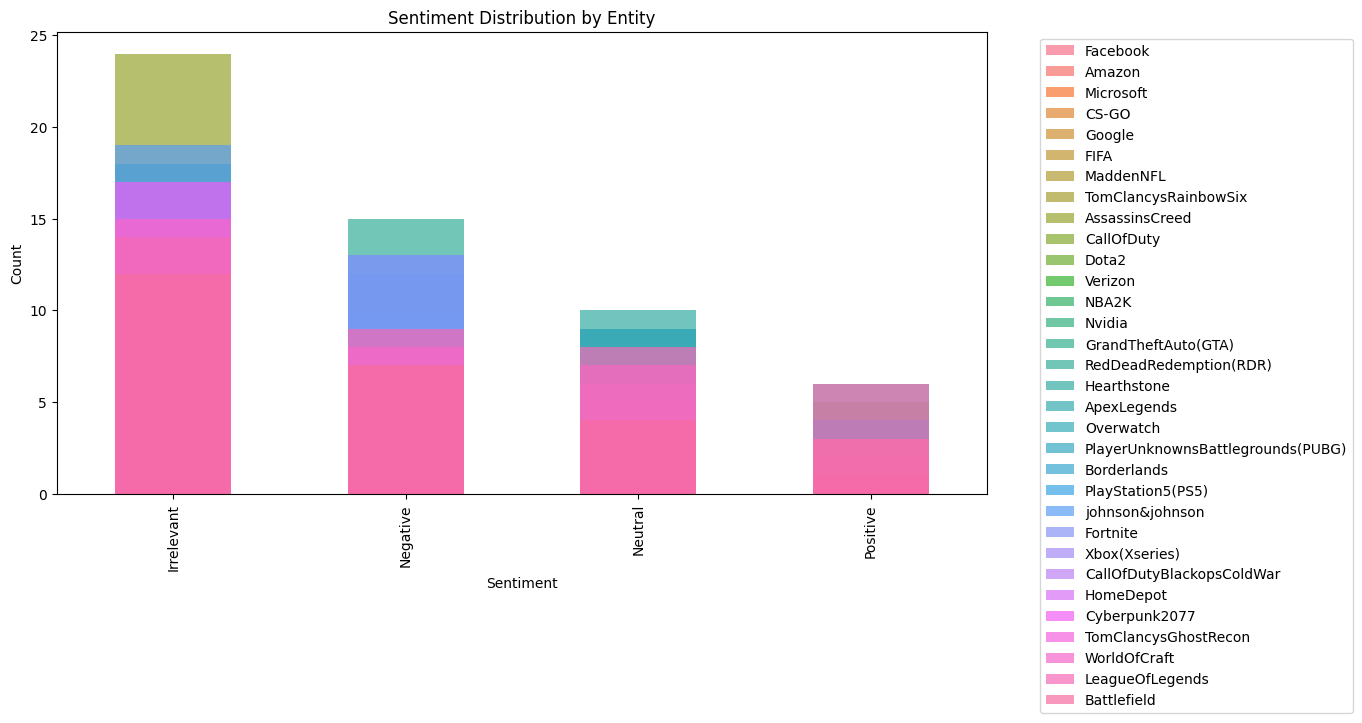

In [69]:
#Sentiment Distribution by Entity:

# Get unique entities from the 'Borderlands' column
entities = training_data['Borderlands'].unique()  # or validation_data if you're working with that DataFrame

# Define a color palette with enough colors for each entity
colors = sns.color_palette('husl', n_colors=len(entities))

# Plot sentiment distribution for each entity
plt.figure(figsize=(12, 6))
for i, entity in enumerate(entities):
    entity_sentiment_counts = training_data[training_data['Borderlands'] == entity]['Sentiment'].value_counts()
    entity_sentiment_counts.plot(kind='bar', alpha=0.7, label=entity, color=colors[i])

# Display legend at the extreme right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


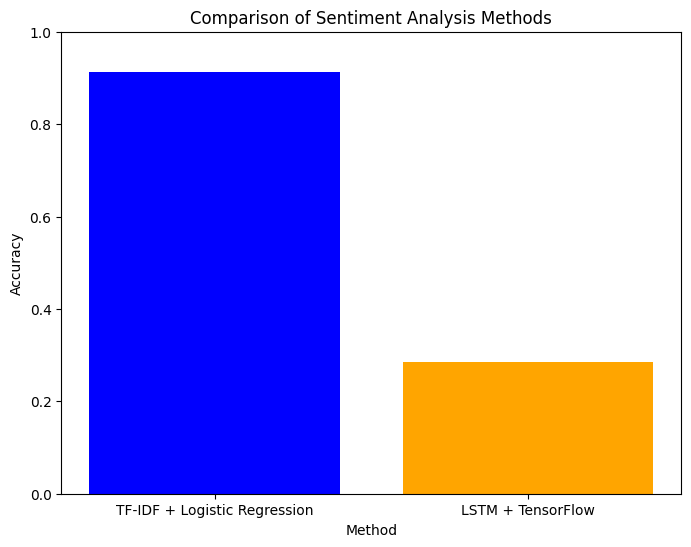

In [70]:
# Plot comparison of methods

# Define the methods and their accuracy scores
methods = ['TF-IDF + Logistic Regression', 'LSTM + TensorFlow']
accuracy_scores = [0.912, 0.285]  # Placeholder accuracy score for LSTM

# Plot comparison of methods
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_scores, color=['blue', 'orange'])
plt.title('Comparison of Sentiment Analysis Methods')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to match the range of accuracy scores
plt.show()


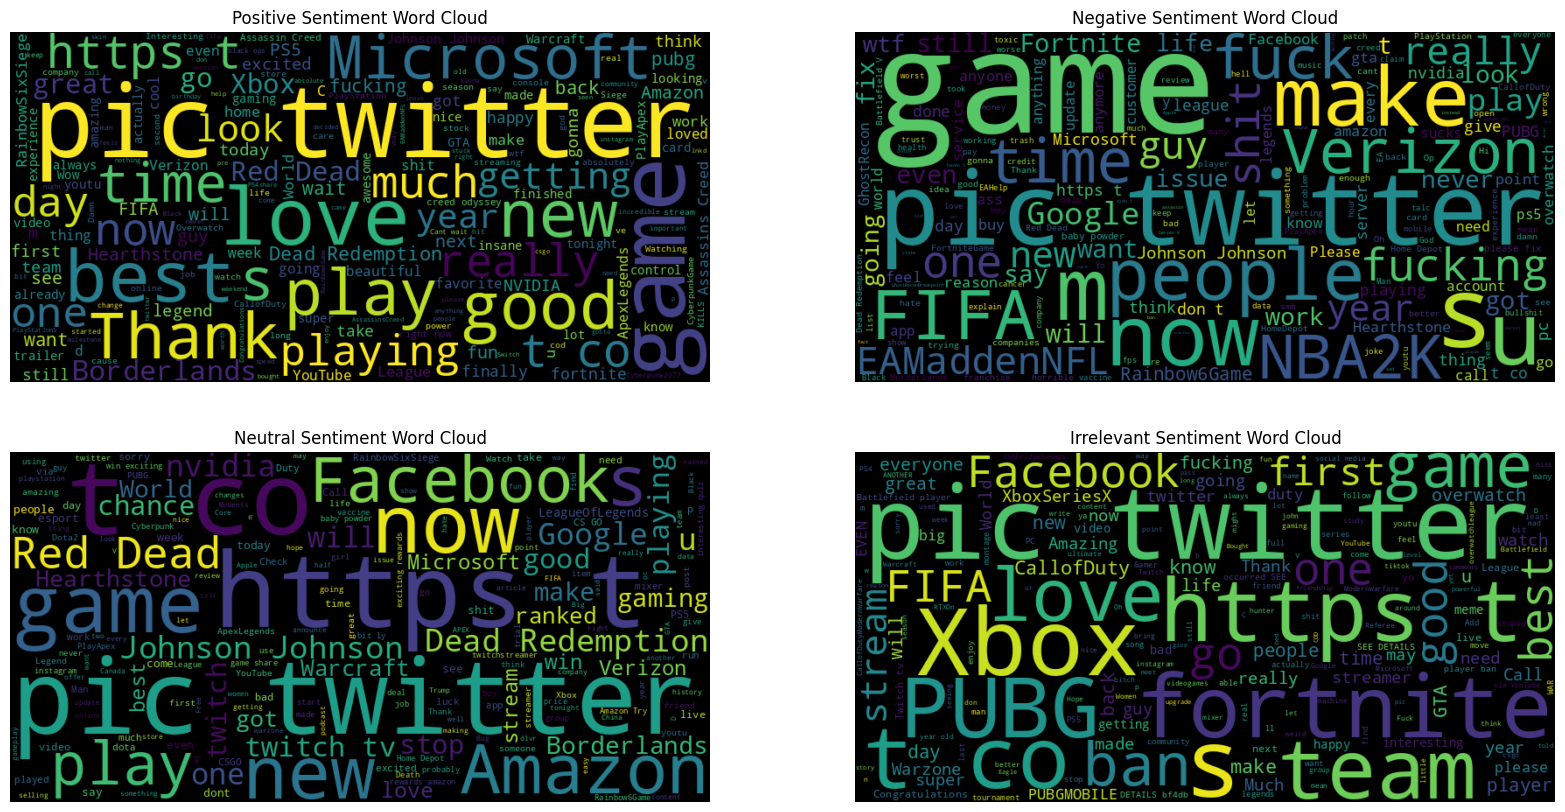

In [71]:
# Word Clouds:

from wordcloud import WordCloud

# Generate word clouds
positive_words = ' '.join(training_data[training_data['Sentiment'] == 'Positive']['Tweet Content'])
negative_words = ' '.join(training_data[training_data['Sentiment'] == 'Negative']['Tweet Content'])
neutral_words = ' '.join(training_data[training_data['Sentiment'] == 'Neutral']['Tweet Content'])
irrelevant_words = ' '.join(training_data[training_data['Sentiment'] == 'Irrelevant']['Tweet Content'])

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_words)
wordcloud_neutral = WordCloud(width=800, height=400).generate(neutral_words)
wordcloud_irrelevant = WordCloud(width=800, height=400).generate(irrelevant_words)

# Plot word clouds
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(222)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.subplot(223)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.subplot(224)
plt.imshow(wordcloud_irrelevant, interpolation='bilinear')
plt.title('Irrelevant Sentiment Word Cloud')
plt.axis('off')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


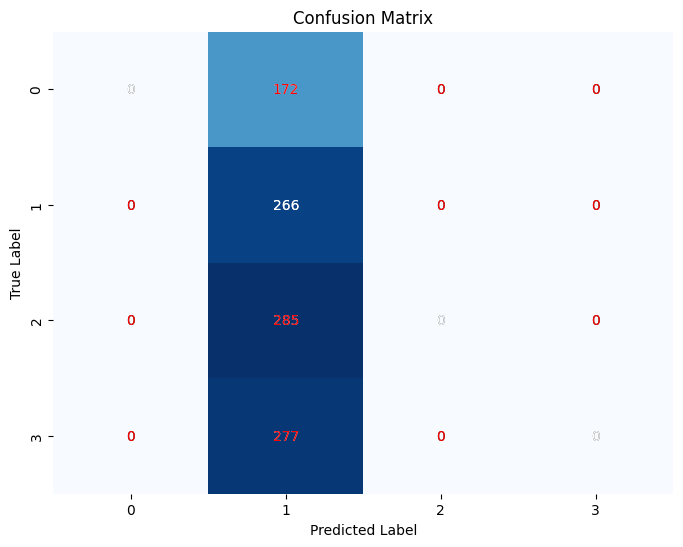

Accuracy: 0.266
Precision: 0.070756
Recall: 0.266
F1-score: 0.1117788309636651


In [72]:
# Confusion Matrix
# Predict on validation data


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert sentiment labels to numerical format
sentiments = ['Irrelevant', 'Neutral', 'Negative', 'Positive']
label_encoder = LabelEncoder()
label_encoder.fit(sentiments)
y_true_encoded = label_encoder.transform(validation_data['Sentiment'])

# Encode predicted labels using the same label encoder
y_pred_encoded = label_encoder.transform(y_pred_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_encoded, y_pred_encoded)

# Calculate metrics
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add TP, TN, FP, FN counts to the plot
for i in range(len(sentiments)):
    for j in range(len(sentiments)):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]), ha='center', va='center', color='red' if i != j else 'white')

plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [73]:
#The aim of the confusion matrix is to provide a visual representation of the performance of a classification model.
#It helps us understand how well the model is performing in terms of making predictions on the validation dataset.

#In the confusion matrix, each row represents the actual class, while each column represents the predicted class.
#The cells of the matrix show the count (or percentage) of instances that fall into each category.

#Interpretation:

#True Positives (TP): These are the instances where the model correctly predicts the positive class
#(e.g., Positive sentiment).
#True Negatives (TN): These are the instances where the model correctly predicts the negative class
#(e.g., Irrelevant sentiment).
#False Positives (FP): These are the instances where the model incorrectly predicts the positive class
#(e.g., Predicted Positive, but actually Negative or Neutral).
#False Negatives (FN): These are the instances where the model incorrectly predicts the negative class
#(e.g., Predicted Negative, but actually Positive or Neutral).

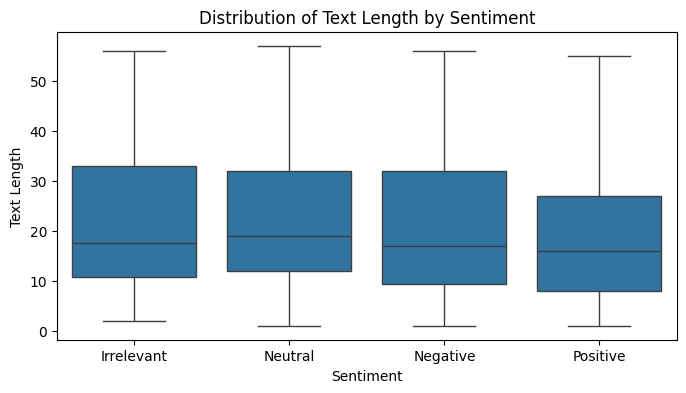

In [74]:
# Distribution of Text Length:

# Calculate text length
training_data['Text Length'] = training_data['Tweet Content'].apply(lambda x: len(x.split()))
validation_data['Text Length'] = validation_data['Tweet Content'].apply(lambda x: len(x.split()))

# Plot text length distribution by sentiment
plt.figure(figsize=(8, 4))
sns.boxplot(data=training_data, x='Sentiment', y='Text Length')
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


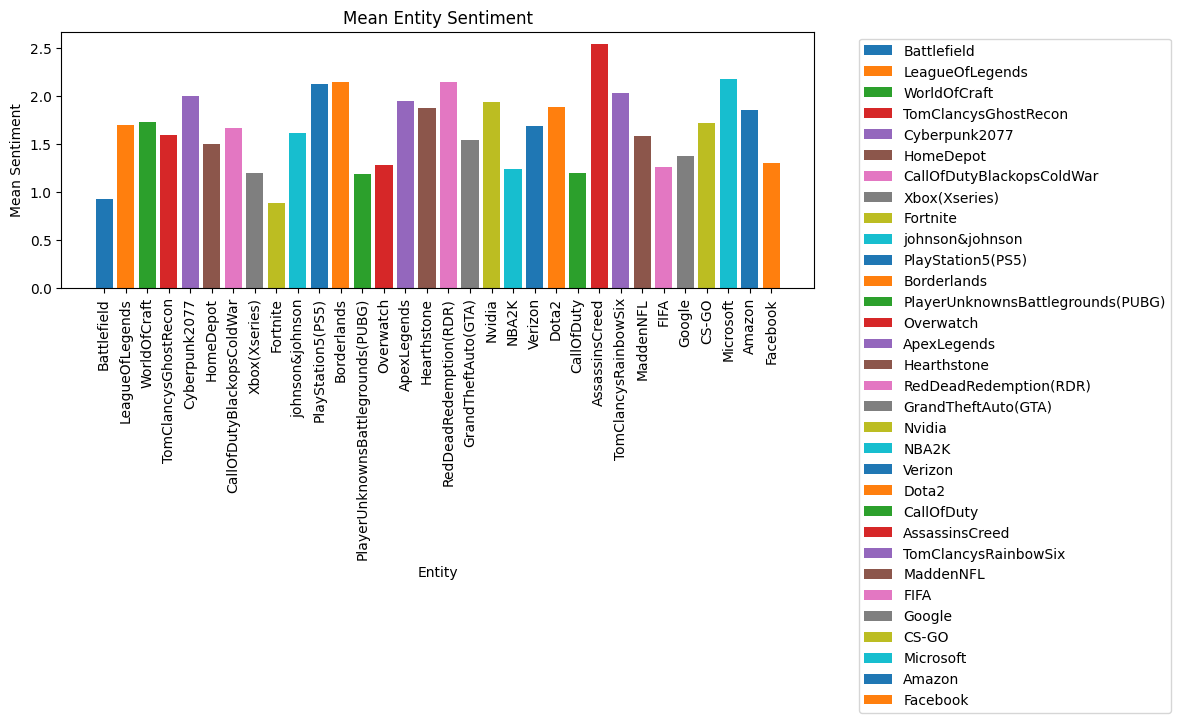

In [75]:
# Entity Sentiment Trends:

from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels to numerical format
label_encoder = LabelEncoder()
training_data['Sentiment_Encoded'] = label_encoder.fit_transform(training_data['Sentiment'])

# Get unique entities from the 'Borderlands' column
entities = training_data['Borderlands'].unique()

# Plot entity sentiment trends
plt.figure(figsize=(12, 6))

# Reverse the order of entities
entities = entities[::-1]

for entity in entities:
    entity_sentiment_mean = training_data[training_data['Borderlands'] == entity]['Sentiment_Encoded'].mean()
    plt.bar(entity, entity_sentiment_mean, label=entity)

plt.title('Mean Entity Sentiment')
plt.xlabel('Entity')
plt.ylabel('Mean Sentiment')

# Rotate labels on X-axis vertically
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Recommendations:

In [76]:
# Based on the analysis findings, we can offer actionable recommendations to content creators or marketers to
# enhance engagement and satisfaction on YouTube. These recommendations could include:

# 1. Identifying popular topics or themes that generate positive sentiment and creating more content around them.
# 2. Content creators and marketers can use the TfidfVectorizer-based model(because of its higher Top-1 Classification Accuracy)
  #to gain valuable insights into audience sentiment and tailor their strategies accordingly to enhance engagement
  #and satisfaction on the platform.
# 3. Addressing common issues or concerns highlighted in negative sentiment comments to improve audience satisfaction.
# 4. Engaging with the audience by responding to comments, addressing feedback, and fostering a sense of community.
# 5. Experimenting with different content formats, styles, or delivery methods to better resonate with the audience.
# 6. Leveraging insights from sentiment analysis to tailor marketing strategies and promotional campaigns effectively.